In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import zipfile

In [ ]:
import random

In [ ]:
import nltk
import re

nltk.download('punkt')  # Download the punkt tokenizer if not already downloaded
def preprocess_text(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Lowercase the tokens
    tokens = [token.lower() for token in tokens]

    # Join the tokens back into a sentence
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def preprocess_target_data(sentences):
  target = map(lambda s:(' ').join(['<s>',s,'</s>']) ,sentences)
  return list(target)

In [ ]:
unzip = zipfile.ZipFile('/content/fra-eng.zip')
unzip.extractall()
unzip.close()

In [ ]:
with open('/content/fra.txt',encoding='utf-8') as d:
  data = d.read().splitlines()
random.seed(0)
random.shuffle(data)
data

["Does anybody have a question?\tQuelqu'un a-t-il une question\xa0?\tCC-BY 2.0 (France) Attribution: tatoeba.org #9669068 (CK) & #11865851 (lbdx)",
 "I need to talk to you about something.\tJ'ai besoin de vous parler de quelque chose.\tCC-BY 2.0 (France) Attribution: tatoeba.org #2387757 (CK) & #7802557 (Aiji)",
 'She was lying face down on the bed.\tElle était couchée à plat ventre sur le lit.\tCC-BY 2.0 (France) Attribution: tatoeba.org #312149 (Dejo) & #1176015 (belgavox)',
 'I wonder why Tom always does that.\tJe me demande pourquoi Tom fait toujours ça.\tCC-BY 2.0 (France) Attribution: tatoeba.org #6818782 (CK) & #6819263 (Rockaround)',
 "I did everything I could think of.\tJ'ai fait tout ce à quoi je pouvais penser.\tCC-BY 2.0 (France) Attribution: tatoeba.org #4664497 (CK) & #6402492 (Aiji)",
 'She advised him to go home early.\tElle lui conseilla de rentrer tôt chez lui.\tCC-BY 2.0 (France) Attribution: tatoeba.org #886894 (CK) & #1357939 (sacredceltic)',
 "Don't be so impatien

In [ ]:
en_fr = [line.split('\t')[0:2] for line in data]
en_fr = np.array(en_fr)
en_fr.shape

(229803, 2)

In [ ]:
def make_data(en_fr):
  en_data = en_fr[:,0]
  fr_data = en_fr[:,1]
  return en_data,fr_data

In [ ]:
en_data,fr_data = make_data(en_fr)
en_data.shape,fr_data.shape

((229803,), (229803,))

In [ ]:
en_data = [preprocess_text(txt) for txt in en_data]

In [ ]:
en_data=np.array(en_data)
en_data

array(['does anybody have a question ?',
       'i need to talk to you about something .',
       'she was lying face down on the bed .', ...,
       "you 'll learn how to do it sooner or later .",
       'i have seen him many times .',
       'the two politicians met face to face for the first time .'],
      dtype='<U327')

In [ ]:
fr_data = [preprocess_text(txt) for txt in fr_data]
fr_data

["quelqu'un a-t-il une question ?",
 "j'ai besoin de vous parler de quelque chose .",
 'elle était couchée à plat ventre sur le lit .',
 'je me demande pourquoi tom fait toujours ça .',
 "j'ai fait tout ce à quoi je pouvais penser .",
 'elle lui conseilla de rentrer tôt chez lui .',
 'ne sois pas tellement impatiente !',
 'il a perdu son fils dans un accident de la route .',
 'faisons une partie de tennis .',
 'je déteste travailler avec des enfants .',
 'tom semble contribuer .',
 'je dois finir mes devoirs avant le dîner .',
 'ça tiendra dans ton sac à main ?',
 'tout avait été prévu .',
 'nous souffrons .',
 'les chats peuvent voir même dans les endroits sombres .',
 "cesse de reporter ta recherche d'emploi .",
 'vous êtes très émotifs .',
 'nous reviendrons dès que possible .',
 "vous étiez terrifié , n'est-ce pas ?",
 "un jeune homme nous demanda s'il pouvait réussir comme orateur .",
 'nous ne faisons pas ça très souvent .',
 'tom et mary organisent une fête vendredi soir .',
 'l

In [ ]:
fr_data =preprocess_target_data(fr_data)
fr_data

["<s> quelqu'un a-t-il une question ? </s>",
 "<s> j'ai besoin de vous parler de quelque chose . </s>",
 '<s> elle était couchée à plat ventre sur le lit . </s>',
 '<s> je me demande pourquoi tom fait toujours ça . </s>',
 "<s> j'ai fait tout ce à quoi je pouvais penser . </s>",
 '<s> elle lui conseilla de rentrer tôt chez lui . </s>',
 '<s> ne sois pas tellement impatiente ! </s>',
 '<s> il a perdu son fils dans un accident de la route . </s>',
 '<s> faisons une partie de tennis . </s>',
 '<s> je déteste travailler avec des enfants . </s>',
 '<s> tom semble contribuer . </s>',
 '<s> je dois finir mes devoirs avant le dîner . </s>',
 '<s> ça tiendra dans ton sac à main ? </s>',
 '<s> tout avait été prévu . </s>',
 '<s> nous souffrons . </s>',
 '<s> les chats peuvent voir même dans les endroits sombres . </s>',
 "<s> cesse de reporter ta recherche d'emploi . </s>",
 '<s> vous êtes très émotifs . </s>',
 '<s> nous reviendrons dès que possible . </s>',
 "<s> vous étiez terrifié , n'est-ce

In [ ]:
def remove_as(fr_data):
  strencode = [line.encode("ascii", "ignore") for line in fr_data]
  strdecode = [s.decode() for s in strencode]
  return strdecode

In [ ]:
s=remove_as(fr_data)
fr_data = np.array(s)

In [ ]:
fr_data

array(["<s> quelqu'un a-t-il une question ? </s>",
       "<s> j'ai besoin de vous parler de quelque chose . </s>",
       '<s> elle tait couche  plat ventre sur le lit . </s>', ...,
       '<s> vous apprendrez  le faire tt ou tard . </s>',
       "<s> je l'ai vu  maintes reprises . </s>",
       '<s> les deux politiciens se sont rencontrs en face  face pour la premire fois . </s>'],
      dtype='<U352')

In [ ]:
def split_data(data_en,data_fr,size):
  split = len(data_en)-int(len(data_en)*size)
  data_en_train = data_en[:split]
  data_en_val = data_en[split:]
  data_fr_train = data_fr[:split]
  data_fr_val = data_fr[split:]
  return data_en_train,data_en_val,data_fr_train,data_fr_val

In [ ]:
data_en_train,data_en_val,data_fr_train,data_fr_val = split_data(en_data,fr_data,0.2)
len(data_en_train),len(data_fr_train),len(data_en_val),len(data_fr_val)

(183843, 183843, 45960, 45960)

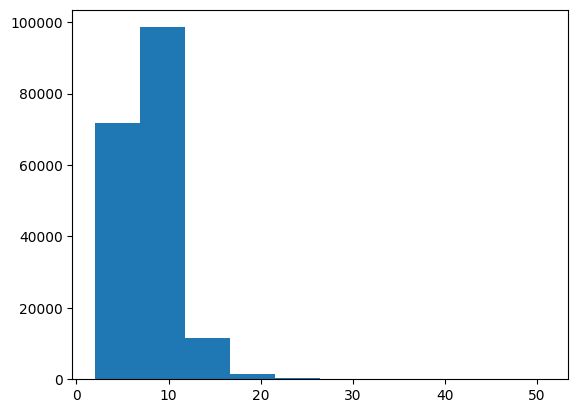

12


In [ ]:
len_inp_list = [len(line.split()) for line in data_en_train]
plt.hist(len_inp_list)
plt.show()
avg_len_tex = int(np.percentile(len_inp_list,95))
print(avg_len_tex)

In [ ]:
tokenizer_input = Tokenizer(oov_token='<OOV>',filters='"#$%&()*+-/:;=@[\\]^_`{|}~\t\n')
tokenizer_input.fit_on_texts(data_en_train)
word_ = tokenizer_input.word_index
data_inp_sequence = tokenizer_input.texts_to_sequences(data_en_train)
data_inp_sequence_padded = pad_sequences(data_inp_sequence,maxlen=avg_len_tex,padding='post',truncating='post')


In [ ]:
vocab_size_inp = len(word_)+1

In [ ]:
tokenizer_target = Tokenizer(oov_token='<OOV>',filters='"#$%$()*+-/:;=@[\\]^_`{|}~\t\n')
tokenizer_target.fit_on_texts(data_fr_train)
word_targ = tokenizer_target.word_index

In [ ]:
vocab_size_targ=len(word_targ)+1

In [ ]:
def generate_decoder_input_target(sentences,tokenizer):
  sequences = tokenizer.texts_to_sequences(sentences)
  decoder_inputs = [s[:-1] for s in sequences]
  decoder_targets = [s[1:] for s in sequences]
  return decoder_inputs,decoder_targets

In [ ]:
decoder_inputs,decoder_targets = generate_decoder_input_target(data_fr_train,tokenizer_target)

In [ ]:
decoder_inputs[0],decoder_targets[0]

([2, 163, 12, 43, 18, 26, 255, 8, 3], [163, 12, 43, 18, 26, 255, 8, 3, 4])

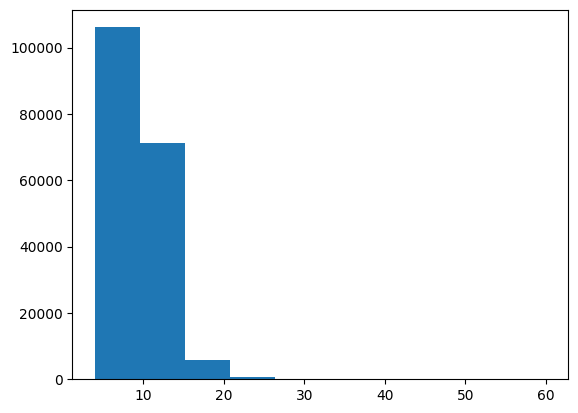

15


In [ ]:
len_targ_list = [len(line.split()) for line in data_fr_train]
plt.hist(len_targ_list)
plt.show()
avg_targ_tex = int(np.percentile(len_targ_list,95))
print(avg_targ_tex)

In [ ]:
decoder_inputs_padded = pad_sequences(decoder_inputs,maxlen=15,padding='post',truncating='post')
decoder_targets_padded = pad_sequences(decoder_targets,maxlen=15,padding='post',truncating='post')

In [ ]:
def process_val(en_val,fr_val):
  fr_val = preprocess_target_data(fr_val)
  en_val_sequence = tokenizer_input.texts_to_sequences(en_val)
  fr_decoder_val_inputs,fr_decoder_val_targets = generate_decoder_input_target(fr_val,tokenizer_target)
  en_val_padd = pad_sequences(en_val_sequence,maxlen=avg_len_tex,padding='post',truncating='post')
  decoder_padd_inputs = pad_sequences(fr_decoder_val_inputs,maxlen=20,padding='post',truncating='post')
  decoder_padd_targets = pad_sequences(fr_decoder_val_targets,maxlen=20,padding='post',truncating='post')
  return en_val_padd,decoder_padd_inputs,decoder_padd_targets

In [ ]:
padded_val_encoder_inputs, padded_val_decoder_inputs, padded_val_decoder_targets = process_val(data_en_val,data_fr_val)

In [ ]:
embedding_encoder_layer = tf.keras.layers.Embedding(input_dim=vocab_size_inp,output_dim=128,mask_zero=True,name='Embedding_encoder_layer')
embedding_decoder_layer = tf.keras.layers.Embedding(input_dim=vocab_size_targ,output_dim=128,mask_zero=True,name='Embedding_decoder_layer')

In [ ]:
encoder_input = tf.keras.layers.Input(shape=[None],name='Input_encoder')
embedding_encoder = embedding_encoder_layer(encoder_input)
encoder_outputs, state_h, state_c = tf.keras.layers.LSTM(256,return_state=True,name='Encoder_LSTM',dropout=0.2)(embedding_encoder)
encoder_states = (state_h,state_c)

In [ ]:
decoder_input = tf.keras.layers.Input(shape=[None],name='Decoder_input')
embedding_decoder = embedding_decoder_layer(decoder_input)
decoder_outputs, _, _ = tf.keras.layers.LSTM(256,return_sequences=True,return_state=True,name='decoder_Lstm',dropout=0.2)(embedding_decoder,initial_state=encoder_states)
decoder_dense = tf.keras.layers.Dense(vocab_size_targ, activation='softmax', name='decoder_dense')
y_proba = decoder_dense(decoder_outputs)

In [ ]:
model_0 = tf.keras.Model([encoder_input,decoder_input],y_proba,name='EN_FR_translator')
model_0.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

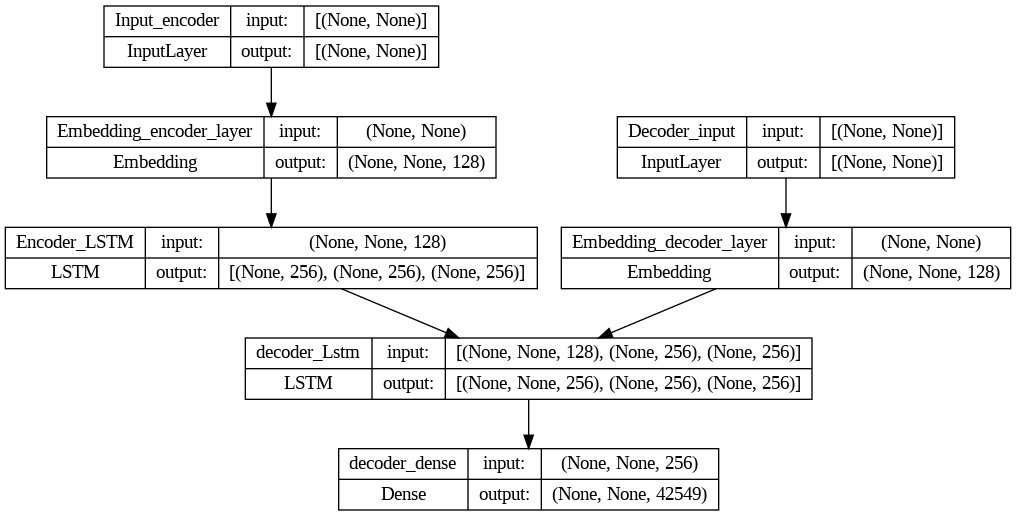

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_0, to_file='eng_fr_seq2seq.png', show_shapes=True, show_layer_names=True)

In [ ]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath='task/model_0',
                                                         save_best_only=True,
                                                         monitor='val_loss',
                                                 save_weights_only=True)

In [ ]:
history = model_0.fit([data_inp_sequence_padded, decoder_inputs_padded], decoder_targets_padded,batch_size=32,epochs=10,validation_data=([padded_val_encoder_inputs, padded_val_decoder_inputs], padded_val_decoder_targets),callbacks=[checkpoint_callback])

Epoch 1/10
5746/5746 [==============================] - 387s 65ms/step - loss: 3.8055 - accuracy: 0.4249 - val_loss: 4.3317 - val_accuracy: 0.5124
Epoch 2/10
5746/5746 [==============================] - 360s 63ms/step - loss: 2.4215 - accuracy: 0.5658 - val_loss: 4.2851 - val_accuracy: 0.4691
Epoch 3/10
5746/5746 [==============================] - 359s 62ms/step - loss: 1.8618 - accuracy: 0.6305 - val_loss: 4.3938 - val_accuracy: 0.4888
Epoch 4/10
5746/5746 [==============================] - 359s 62ms/step - loss: 1.5136 - accuracy: 0.6758 - val_loss: 4.3584 - val_accuracy: 0.5044
Epoch 5/10
5746/5746 [==============================] - 359s 62ms/step - loss: 1.2784 - accuracy: 0.7101 - val_loss: 4.4130 - val_accuracy: 0.5126
Epoch 6/10
5746/5746 [==============================] - 358s 62ms/step - loss: 1.1105 - accuracy: 0.7363 - val_loss: 4.4809 - val_accuracy: 0.5180
Epoch 7/10
5746/5746 [==============================] - 358s 62ms/step - loss: 0.9861 - accuracy: 0.7579 - val_loss: 4

In [ ]:
eval=model_0.evaluate([padded_val_encoder_inputs, padded_val_decoder_inputs], padded_val_decoder_targets)
eval

1437/1437 [==============================] - 59s 41ms/step - loss: 4.6351 - accuracy: 0.5266


[4.635059833526611, 0.5265889763832092]

In [ ]:
new_batch_size = 20 # or any smaller value
new_padded_val_encoder_inputs = padded_val_encoder_inputs[:new_batch_size]
new_padded_val_decoder_inputs = padded_val_decoder_inputs[:new_batch_size]

# Generate predictions
predictions = model_0.predict([new_padded_val_encoder_inputs, new_padded_val_decoder_inputs])


1/1 [==============================] - 0s 59ms/step


In [ ]:
predictions.shape

(20, 20, 42549)

In [ ]:
max=np.argmax(predictions,axis=2)
max.shape

(20, 20)

In [ ]:
padded_val_decoder_targets[:new_batch_size]

array([[    2,   319,   296,     3,     4,     3,     4,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    2,    74,    59,    13,  8412,    14,     3,     4,     3,
            4,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    2,    29,  1083,     3,     4,     3,     4,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    2,     5,    26, 10338,     3,     4,     3,     4,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    2,    17,    15,   250,   162,   603,    23,  1163,     3,
            4,     3,     4,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    2,     5,    26,  1139,     6,   158,   209,   434,  6518,
            3,     4,     3,     4,     0,     0,     0,     0,     0,
            0,     0],
       [  

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

# Assuming padded_val_decoder_targets and predicted_sequences are lists of tokenized words
bleu_scores = [sentence_bleu([reference], candidate) for reference, candidate in zip(padded_val_decoder_targets[:new_batch_size], max)]
average_bleu = np.mean(bleu_scores)

print(f"Average BLEU Score: {average_bleu}")

Average BLEU Score: 0.07534016715375083


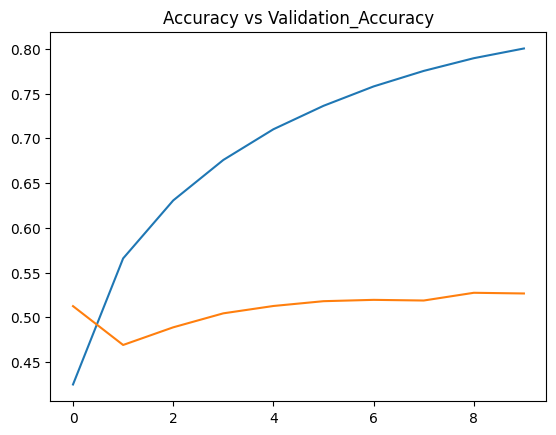

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend
plt.title('Accuracy vs Validation_Accuracy')
plt.show()

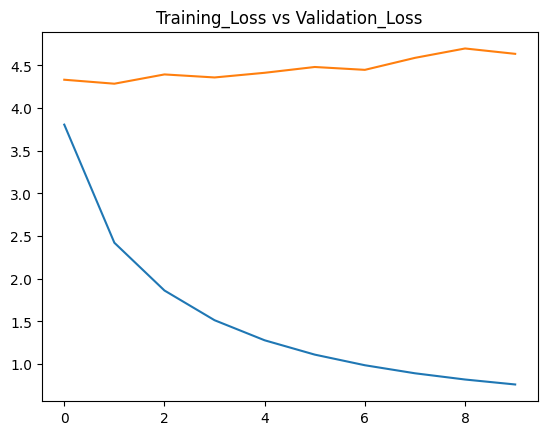

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Training_Loss vs Validation_Loss')
plt.show()

In [ ]:
encoder_inputs = model_0.get_layer('Input_encoder').input

encoder_embedding_layer = model_0.get_layer('Embedding_encoder_layer')
encoder_embeddings = encoder_embedding_layer(encoder_inputs)

encoder_lstm = model_0.get_layer('Encoder_LSTM')

_, encoder_state_h, encoder_state_c = encoder_lstm(encoder_embeddings)

encoder_states = [encoder_state_h, encoder_state_c]

# Our stand-alone encoder model. encoder_inputs is the input to the encoder,
# and encoder_states is the expected output.
encoder_model_no_attention = tf.keras.Model(encoder_inputs, encoder_states)

In [ ]:
decoder_inputs = model_0.get_layer('Decoder_input').input

decoder_embedding_layer = model_0.get_layer('Embedding_decoder_layer')
decoder_embeddings = decoder_embedding_layer(decoder_inputs)

# Inputs to represent the decoder's LSTM hidden and cell states. We'll populate
# these manually using the encoder's output for the initial state.
decoder_input_state_h = tf.keras.Input(shape=(256,), name='decoder_input_state_h')
decoder_input_state_c = tf.keras.Input(shape=(256,), name='decoder_input_state_c')
decoder_input_states = [decoder_input_state_h, decoder_input_state_c]

decoder_lstm = model_0.get_layer('decoder_Lstm')

decoder_sequence_outputs, decoder_output_state_h, decoder_output_state_c = decoder_lstm(
    decoder_embeddings, initial_state=decoder_input_states
)

# Update hidden and cell states for the next time step.
decoder_output_states = [decoder_output_state_h, decoder_output_state_c]

decoder_dense = model_0.get_layer('decoder_dense')
y_proba = decoder_dense(decoder_sequence_outputs)

decoder_model_no_attention = tf.keras.Model(
    [decoder_inputs] + decoder_input_states,
    [y_proba] + decoder_output_states
)

In [ ]:
def translate_without_attention(sentence: str,
                                source_tokenizer, encoder,
                                target_tokenizer, decoder,
                                max_translated_len = 15):

  # Vectorize the source sentence and run it through the encoder.
  input_seq = source_tokenizer.texts_to_sequences([sentence])

  # Get the tokenized sentence to see if there are any unknown tokens.
  tokenized_sentence = source_tokenizer.sequences_to_texts(input_seq)

  states = encoder.predict(input_seq)

  current_word = '<s>'
  decoded_sentence = []

  while len(decoded_sentence) < max_translated_len:

    # Set the next input word for the decoder.
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = target_tokenizer.word_index[current_word]

    # Determine the next word.
    target_y_proba, h, c = decoder.predict([target_seq] + states)
    target_token_index = np.argmax(target_y_proba[0, -1, :])
    current_word = target_tokenizer.index_word[target_token_index]

    if (current_word == '<\s>'):
      break

    decoded_sentence.append(current_word)
    states = [h, c]

  return tokenized_sentence[0], ' '.join(decoded_sentence)

In [ ]:
test = random.choices(data_en_val,k=10)
test

['Tom is not yet able to swim.',
 "She didn't want him to stay any longer.",
 "I don't think we have any choice.",
 "I'll wait a week.",
 'He left me the keys.',
 'They broke off their engagement.',
 "I hope I'm not bothering you.",
 'Who would you like to speak with?',
 "Where's our money?",
 'I like working for this company.']

In [ ]:
l=[]
for i in range(10):
  z=translate_without_attention(test[i],tokenizer_input,encoder_model_no_attention,tokenizer_target,decoder_model_no_attention)
  l.append(z)

1/1 [==============================] - 0s 18ms/step


In [ ]:
l

[('tom is not yet able to swim.',
  "tom n'est pas encore capable de nager. < s> ! < s> s> ! <"),
 ("she didn't want him to stay any longer.",
  "elle ne voulait pas qu'il restt plus longtemps. < s> s> ! < s> s>"),
 ("i don't think we have any choice.",
  'je ne pense pas que nous ayons le choix. < s> ! < s> s>'),
 ("i'll wait a week.",
  'je vais attendre une semaine. < s> s> ! < s> s> ! < s>'),
 ('he left me the keys.', "il m'a laiss les cls. < s> ! < s> s> ! < s> s>"),
 ('they broke off their engagement.',
  'ils ont leur leur droit de leurs enfants. < s> de lui. < s> s>'),
 ("i hope i'm not bothering you.",
  "j'espre que je ne te drange pas. < s> ! < s> s> ! <"),
 ('who would you like to speak with?',
  'avec qui aimeriez vous parler ? < s> ! < s> s> ! < s>'),
 ("where's our money?", 'o est notre argent ? < s> s> ! < s> s> ! < s>'),
 ('i like working for this company.',
  "j'aime faire en travaille cette anne. < s> s> ! < s> s> ! <")]

In [ ]:
trans=translate_without_attention('why my name is',tokenizer_input,encoder_model_no_attention,tokenizer_target,decoder_model_no_attention)
trans

1/1 [==============================] - 0s 29ms/step


('why my name is', 'pourquoi mon nom est ? < s> ? < s> s> ! < s> s>')

In [ ]:
tokenizer_input = Tokenizer(oov_token='<OOV>',filters='"#$%&()*+-/:;=@[\\]^_`{|}~\t\n')
tokenizer_input.fit_on_texts(data_en_train)
word_ = tokenizer_input.word_index
data_inp_sequence = tokenizer_input.texts_to_sequences(data_en_train)
data_inp_sequence_padded = pad_sequences(data_inp_sequence,maxlen=avg_len_tex,padding='post',truncating='post')

In [ ]:
vocab_size_inp = len(word_)+1

In [ ]:
tokenizer_target = Tokenizer(oov_token='<OOV>',filters='"#$%$()*+-/:;=@[\\]^_`{|}~\t\n')
tokenizer_target.fit_on_texts(data_fr_train)
word_targ = tokenizer_target.word_index

In [ ]:
vocab_size_targ=len(word_targ)+1

In [ ]:
def generate_decoder_input_target(sentences,tokenizer):
  sequences = tokenizer.texts_to_sequences(sentences)
  decoder_inputs = [s[:-1] for s in sequences]
  decoder_targets = [s[1:] for s in sequences]
  return decoder_inputs,decoder_targets

In [ ]:
decoder_inputs,decoder_targets = generate_decoder_input_target(data_fr_train,tokenizer_target)

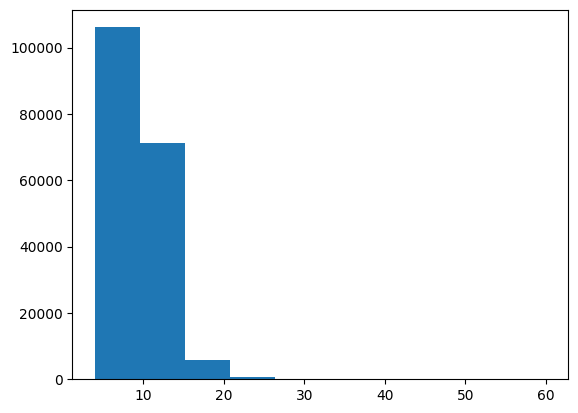

15


In [ ]:
len_targ_list = [len(line.split()) for line in data_fr_train]
plt.hist(len_targ_list)
plt.show()
avg_targ_tex = int(np.percentile(len_targ_list,95))
print(avg_targ_tex)

In [ ]:
decoder_inputs_padded = pad_sequences(decoder_inputs,maxlen=20,padding='post',truncating='post')
decoder_targets_padded = pad_sequences(decoder_targets,maxlen=20,padding='post',truncating='post')

In [ ]:
def process_val(en_val,fr_val):
  fr_val = preprocess_target_data(fr_val)
  en_val_sequence = tokenizer_input.texts_to_sequences(en_val)
  fr_decoder_val_inputs,fr_decoder_val_targets = generate_decoder_input_target(fr_val,tokenizer_target)
  en_val_padd = pad_sequences(en_val_sequence,maxlen=avg_len_tex,padding='post',truncating='post')
  decoder_padd_inputs = pad_sequences(fr_decoder_val_inputs,maxlen=20,padding='post',truncating='post')
  decoder_padd_targets = pad_sequences(fr_decoder_val_targets,maxlen=20,padding='post',truncating='post')
  return en_val_padd,decoder_padd_inputs,decoder_padd_targets

In [ ]:
padded_val_encoder_inputs, padded_val_decoder_inputs, padded_val_decoder_targets = process_val(data_en_val,data_fr_val)

In [ ]:
class Encoder(tf.keras.Model):
  def __init__(self,vocab_size,embedding_dim,hidden_dim):
    super(Encoder,self).__init__()

    self.embedding = tf.keras.layers.Embedding(vocab_size,
                                               embedding_dim,
                                               name='encoder_embedding_layer')
    self.lstm = tf.keras.layers.LSTM(hidden_dim,
                                     return_sequences=True,
                                     return_state=True,
                                     name='encoder_lstm')
  def call(self,input):
    embeddings = self.embedding(input)
    output_seq,state_h,state_c = self.lstm(embeddings)
    return output_seq,state_h,state_c

In [ ]:
embedding_dim=128
hidden_dim=256

In [ ]:
test_encoder = Encoder(vocab_size_inp, embedding_dim, hidden_dim)

In [ ]:
test_encoder_batch = padded_val_encoder_inputs[:3]
print(test_encoder_batch.shape)
test_encoder_batch

(3, 12)


array([[  98,  156,    2,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [  44,   41,    4,   36,   35,    7,    0,    0,    0,    0,    0,
           0],
       [  14, 1522,    2,    0,    0,    0,    0,    0,    0,    0,    0,
           0]], dtype=int32)

In [ ]:
test_encoder_outputs, state_h, state_c = test_encoder(test_encoder_batch)

In [ ]:
print(test_encoder_outputs.shape)
print(state_h.shape)
print(state_c.shape)

(3, 12, 256)
(3, 256)
(3, 256)


In [ ]:
# Sample encoder LSTM output for single sequence of length 4.
encoder_out = tf.constant([[1., 2., 3.],
                           [2., 3., 4.],
                           [3., 4., 5.],
                           [4., 5. ,6.]])

In [ ]:
print('encoder_out shape: {}'.format(encoder_out.shape))
print('Number of timesteps: {}'.format(encoder_out.shape[0]))
print('Number of hidden dimensions: {}'.format(encoder_out.shape[1]))

encoder_out shape: (4, 3)
Number of timesteps: 4
Number of hidden dimensions: 3


In [ ]:
# Sample decoder LSTM output for a single timestep.
decoder_out = tf.constant([[1., 3., 5.]])

In [ ]:
print('decoder_out shape: {}'.format(decoder_out.shape))
print('Number of timesteps: {}'.format(decoder_out.shape[0]))
print('Number of hidden dimensions: {}'.format(decoder_out.shape[1]))

decoder_out shape: (1, 3)
Number of timesteps: 1
Number of hidden dimensions: 3


In [ ]:
tf.transpose(encoder_out)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[1., 2., 3., 4.],
       [2., 3., 4., 5.],
       [3., 4., 5., 6.]], dtype=float32)>

In [ ]:
attention_scores = tf.matmul(decoder_out, encoder_out, transpose_b=True)
print(attention_scores)

tf.Tensor([[22. 31. 40. 49.]], shape=(1, 4), dtype=float32)


In [ ]:
attention_weights = tf.keras.activations.softmax(attention_scores, axis=-1)
print(attention_weights)

tf.Tensor([[1.8792968e-12 1.5228101e-08 1.2339458e-04 9.9987662e-01]], shape=(1, 4), dtype=float32)


In [ ]:
context = tf.matmul(attention_weights, encoder_out)
print(context)

tf.Tensor([[3.9998767 4.9998765 5.999877 ]], shape=(1, 3), dtype=float32)


In [ ]:
class LuongAttention(tf.keras.Model):
  def __init__(self,hidden_dim):
    super(LuongAttention,self).__init__()

    self.w = tf.keras.layers.Dense(hidden_dim,name='decoder_output_dense')
  def call(self,inputs):
    encoder_outputs_seq,decoder_output = inputs
    z=self.w(encoder_outputs_seq)
    attention_scores = tf.matmul(decoder_output,z,transpose_b=True)
    attention_weights = tf.keras.activations.softmax(attention_scores,axis=-1)
    context = tf.matmul(attention_weights,encoder_outputs_seq)
    return attention_weights, context

In [ ]:
class Decoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, hidden_dim):
    super(Decoder, self).__init__()

    self.embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                            embedding_dim,
                                            name='decoder_embedding_layer')

    self.lstm = tf.keras.layers.LSTM(hidden_dim,
                            return_sequences=True,
                            return_state=True,
                            name='decoder_lstm')

    self.attention = LuongAttention(hidden_dim)

    self.w = tf.keras.layers.Dense(hidden_dim, activation='tanh', name='attended_outputs_dense')

    self.dense = tf.keras.layers.Dense(vocab_size, name='decoder_dense')


  def call(self, inputs):
    decoder_input, encoder_output_seq, lstm_state = inputs
    embeddings = self.embedding_layer(decoder_input)

    decoder_output, state_h, state_c = self.lstm(embeddings, initial_state=lstm_state)

    weights, context = self.attention([encoder_output_seq, decoder_output])

    decoder_output_with_attention = self.w(tf.concat(
        [tf.squeeze(context, 1), tf.squeeze(decoder_output, 1)], -1))

    logits = self.dense(decoder_output_with_attention)

    return logits, state_h, state_c, weights

In [ ]:
def loss_func(targets, logits):
  ce_loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

  mask = tf.cast(tf.math.not_equal(targets, 0), tf.float32)

  return ce_loss(targets, logits, sample_weight=mask)

In [ ]:
def acc(targets,logits):
  acc = tf.keras.metrics.Accuracy()
  mask = tf.cast(tf.math.not_equal(targets, 0), tf.float32)

  return acc(targets, logits, sample_weight=mask)

In [ ]:
class TranslatorTrainer(tf.keras.Model):
  def __init__(self, encoder, decoder):
    super(TranslatorTrainer, self).__init__()

    self.encoder = encoder
    self.decoder = decoder

  # This method will be called by model.fit for each batch.
  @tf.function
  def train_step(self, inputs):
      loss = 0.
      acc= 0.
      encoder_input_seq, decoder_input_seq, decoder_target_seq = inputs

      with tf.GradientTape() as tape:
          encoder_output_seq, state_h, state_c = self.encoder(encoder_input_seq)

          # We need to create a loop to iterate through the target sequences
          for i in range(decoder_target_seq.shape[1]):

              # Input to the decoder must have shape of (batch_size, length)
              # so we need to expand one dimension (just like in the previous example).
              next_decoder_input = tf.expand_dims(decoder_input_seq[:, i], 1)
              logits, state_h, state_c, _ = self.decoder(
                  [next_decoder_input, encoder_output_seq, (state_h, state_c)])

              # The loss is now accumulated through the whole batch
              loss += self.loss(decoder_target_seq[:, i], logits)

      # Update the parameters and the optimizer
      variables = self.encoder.trainable_variables + self.decoder.trainable_variables
      gradients = tape.gradient(loss, variables)
      self.optimizer.apply_gradients(zip(gradients, variables))

      return {'loss': loss / decoder_target_seq.shape[1]}

In [ ]:
encoder = Encoder(vocab_size_inp, embedding_dim, hidden_dim)
decoder = Decoder(vocab_size_targ, embedding_dim, hidden_dim)
optimizer = tf.keras.optimizers.Adam()

translator_trainer = TranslatorTrainer(encoder, decoder)
translator_trainer.compile(optimizer=optimizer, loss=loss_func,metrics=['accuracy'])

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((data_inp_sequence_padded,
                                              decoder_inputs_padded,
                                              decoder_targets_padded)).batch(32, drop_remainder=True)
d = dataset.prefetch(tf.data.AUTOTUNE)
val = tf.data.Dataset.from_tensor_slices((padded_val_encoder_inputs,
                                          padded_val_decoder_inputs,
                                          padded_val_decoder_targets

))
v= val.prefetch(tf.data.AUTOTUNE)

In [ ]:
check_point = tf.keras.callbacks.ModelCheckpoint(filepath='tast/model_1',save_best_only=True,monitor='loss')

In [ ]:
epochs = 12
hist=translator_trainer.fit(d, epochs=epochs)

Epoch 1/12
5745/5745 [==============================] - 329s 57ms/step - loss: 0.8355
Epoch 2/12
5745/5745 [==============================] - 328s 57ms/step - loss: 0.5926
Epoch 3/12
5745/5745 [==============================] - 329s 57ms/step - loss: 0.4635
Epoch 4/12
5745/5745 [==============================] - 329s 57ms/step - loss: 0.3791
Epoch 5/12
5745/5745 [==============================] - 328s 57ms/step - loss: 0.3195
Epoch 6/12
5745/5745 [==============================] - 328s 57ms/step - loss: 0.2763
Epoch 7/12
5745/5745 [==============================] - 328s 57ms/step - loss: 0.2443
Epoch 8/12
5745/5745 [==============================] - 325s 57ms/step - loss: 0.2186
Epoch 9/12
5745/5745 [==============================] - 323s 56ms/step - loss: 0.1982
Epoch 10/12
5745/5745 [==============================] - 324s 56ms/step - loss: 0.1806
Epoch 11/12
5745/5745 [==============================] - 329s 57ms/step - loss: 0.1667
Epoch 12/12
5745/5745 [=============================

In [ ]:
def translate_with_attention(sentence: str,
                             source_tokenizer, encoder,
                             target_tokenizer, decoder,
                             max_translated_len = 10):
    input_seq = source_tokenizer.texts_to_sequences([sentence])
    tokenized = source_tokenizer.sequences_to_texts(input_seq)

    input_seq = pad_sequences(input_seq, maxlen=13, padding='post')
    encoder_output, state_h, state_c  = encoder.predict(input_seq)

    current_word = '<s>'
    decoded_sentence = []

    while len(decoded_sentence) < max_translated_len:
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = target_tokenizer.word_index[current_word]

        logits, state_h, state_c, _ = decoder.predict([target_seq, encoder_output, (state_h, state_c)])
        current_token_index = np.argmax(logits[0])

        current_word = target_tokenizer.index_word[current_token_index]

        if (current_word == '</s>'):
          break

        decoded_sentence.append(current_word)

    return tokenized[0], ' '.join(decoded_sentence)

In [ ]:
l=[]
for i in range(10):
  z=translate_with_attention(data_en_val[i],tokenizer_input,encoder,tokenizer_target,decoder)
  l.append(z)


1/1 [==============================] - 0s 47ms/step


In [ ]:
l

[('take everything.', 'prenez tout. < s> < s> nous en attend. <'),
 ('how can you not know?', 'comment peux tu ne pas savoir ? < s> ?'),
 ('it matters.', "a compte. < s> a. < s> c'est ce que"),
 ("i'm enthusiastic.", 'je suis enthousiaste. < s> ! < s> ! <'),
 ('tom spent three years in jail.', 'tom a pass trois ans en prison. < s> <'),
 ("i've been in love with you since <OOV>",
  "j'tais amoureux de toi depuis le bout de la journe."),
 ("it's getting dark.", 'a devient sombre. < s> s> je commence faire nuit.'),
 ('they made him work.', "ils l'ont fait travailler. < s> < s> s> a."),
 ('i was absent from school because i was sick.',
  "j'tais absente de l'cole, parce que j'tais malade. < s>"),
 ("the explanation wasn't difficult to understand.",
  "l'explication n'tait pas difficile de comprendre. < s> ne s'agissait")]

In [ ]:
trans=translate_with_attention('why my name is',tokenizer_input,encoder,tokenizer_target,decoder)
trans

1/1 [==============================] - 0s 33ms/step


('why my name is', 'pourquoi mon nom est il ? < s> ? <')